Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Uploaded file: WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset shape: (7043, 21)

First 5 rows:
=== DATASET INFORMATION ===
Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract 

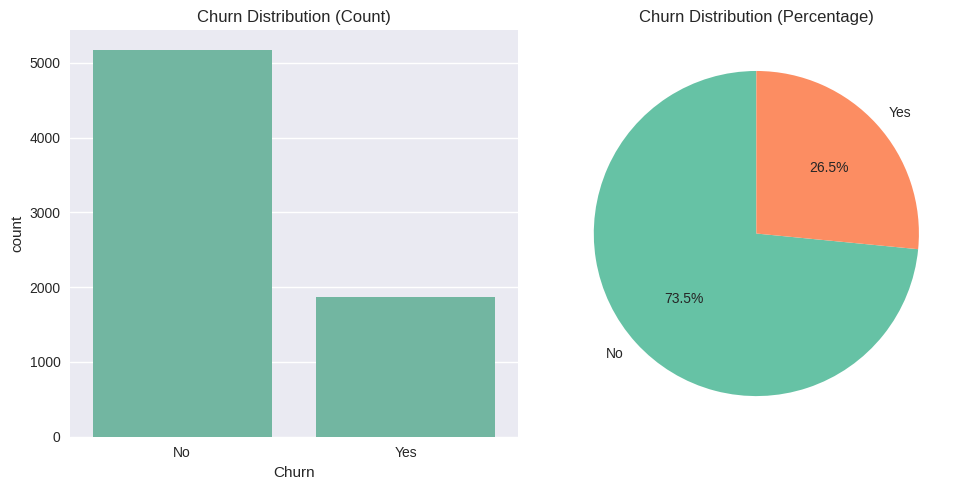


=== DESCRIPTIVE STATISTICS ===
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000
Missing values before handling:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

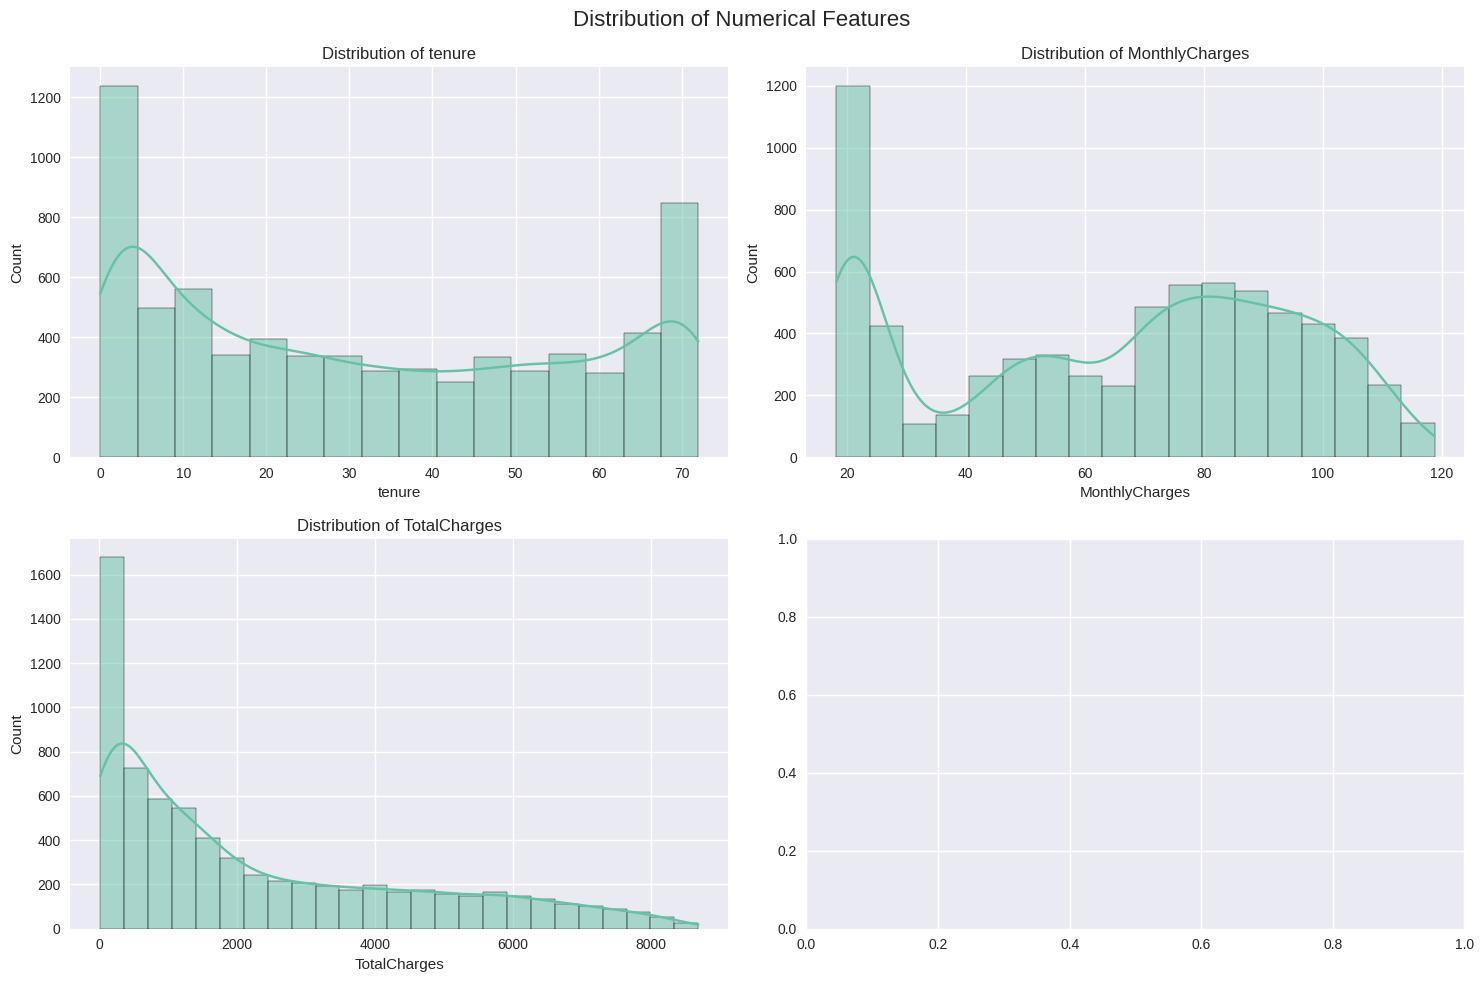

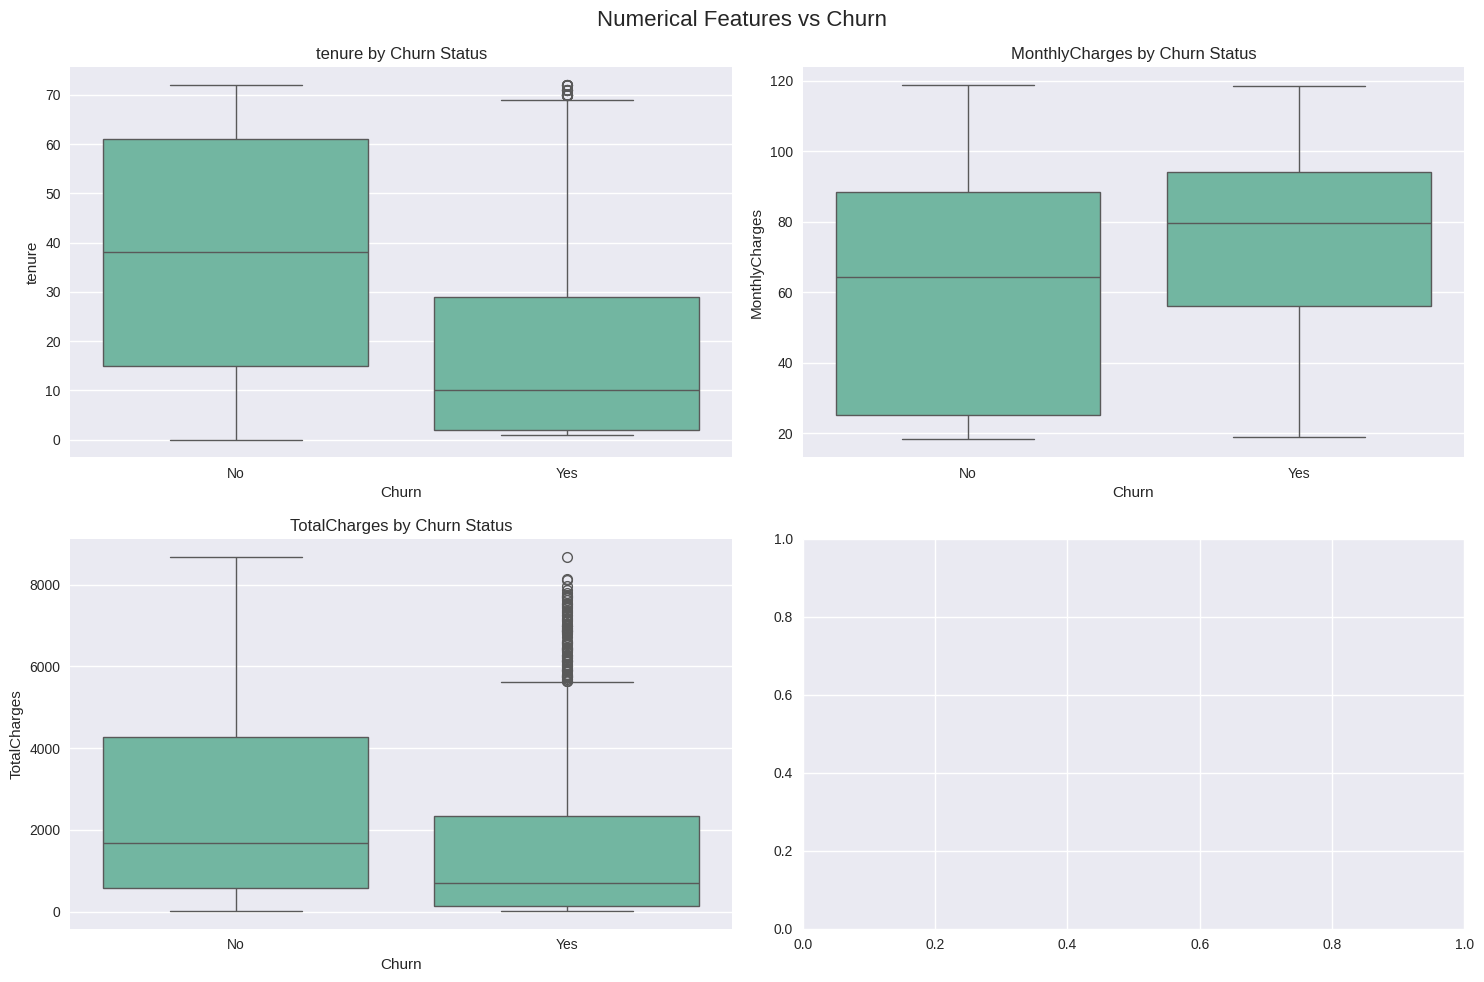

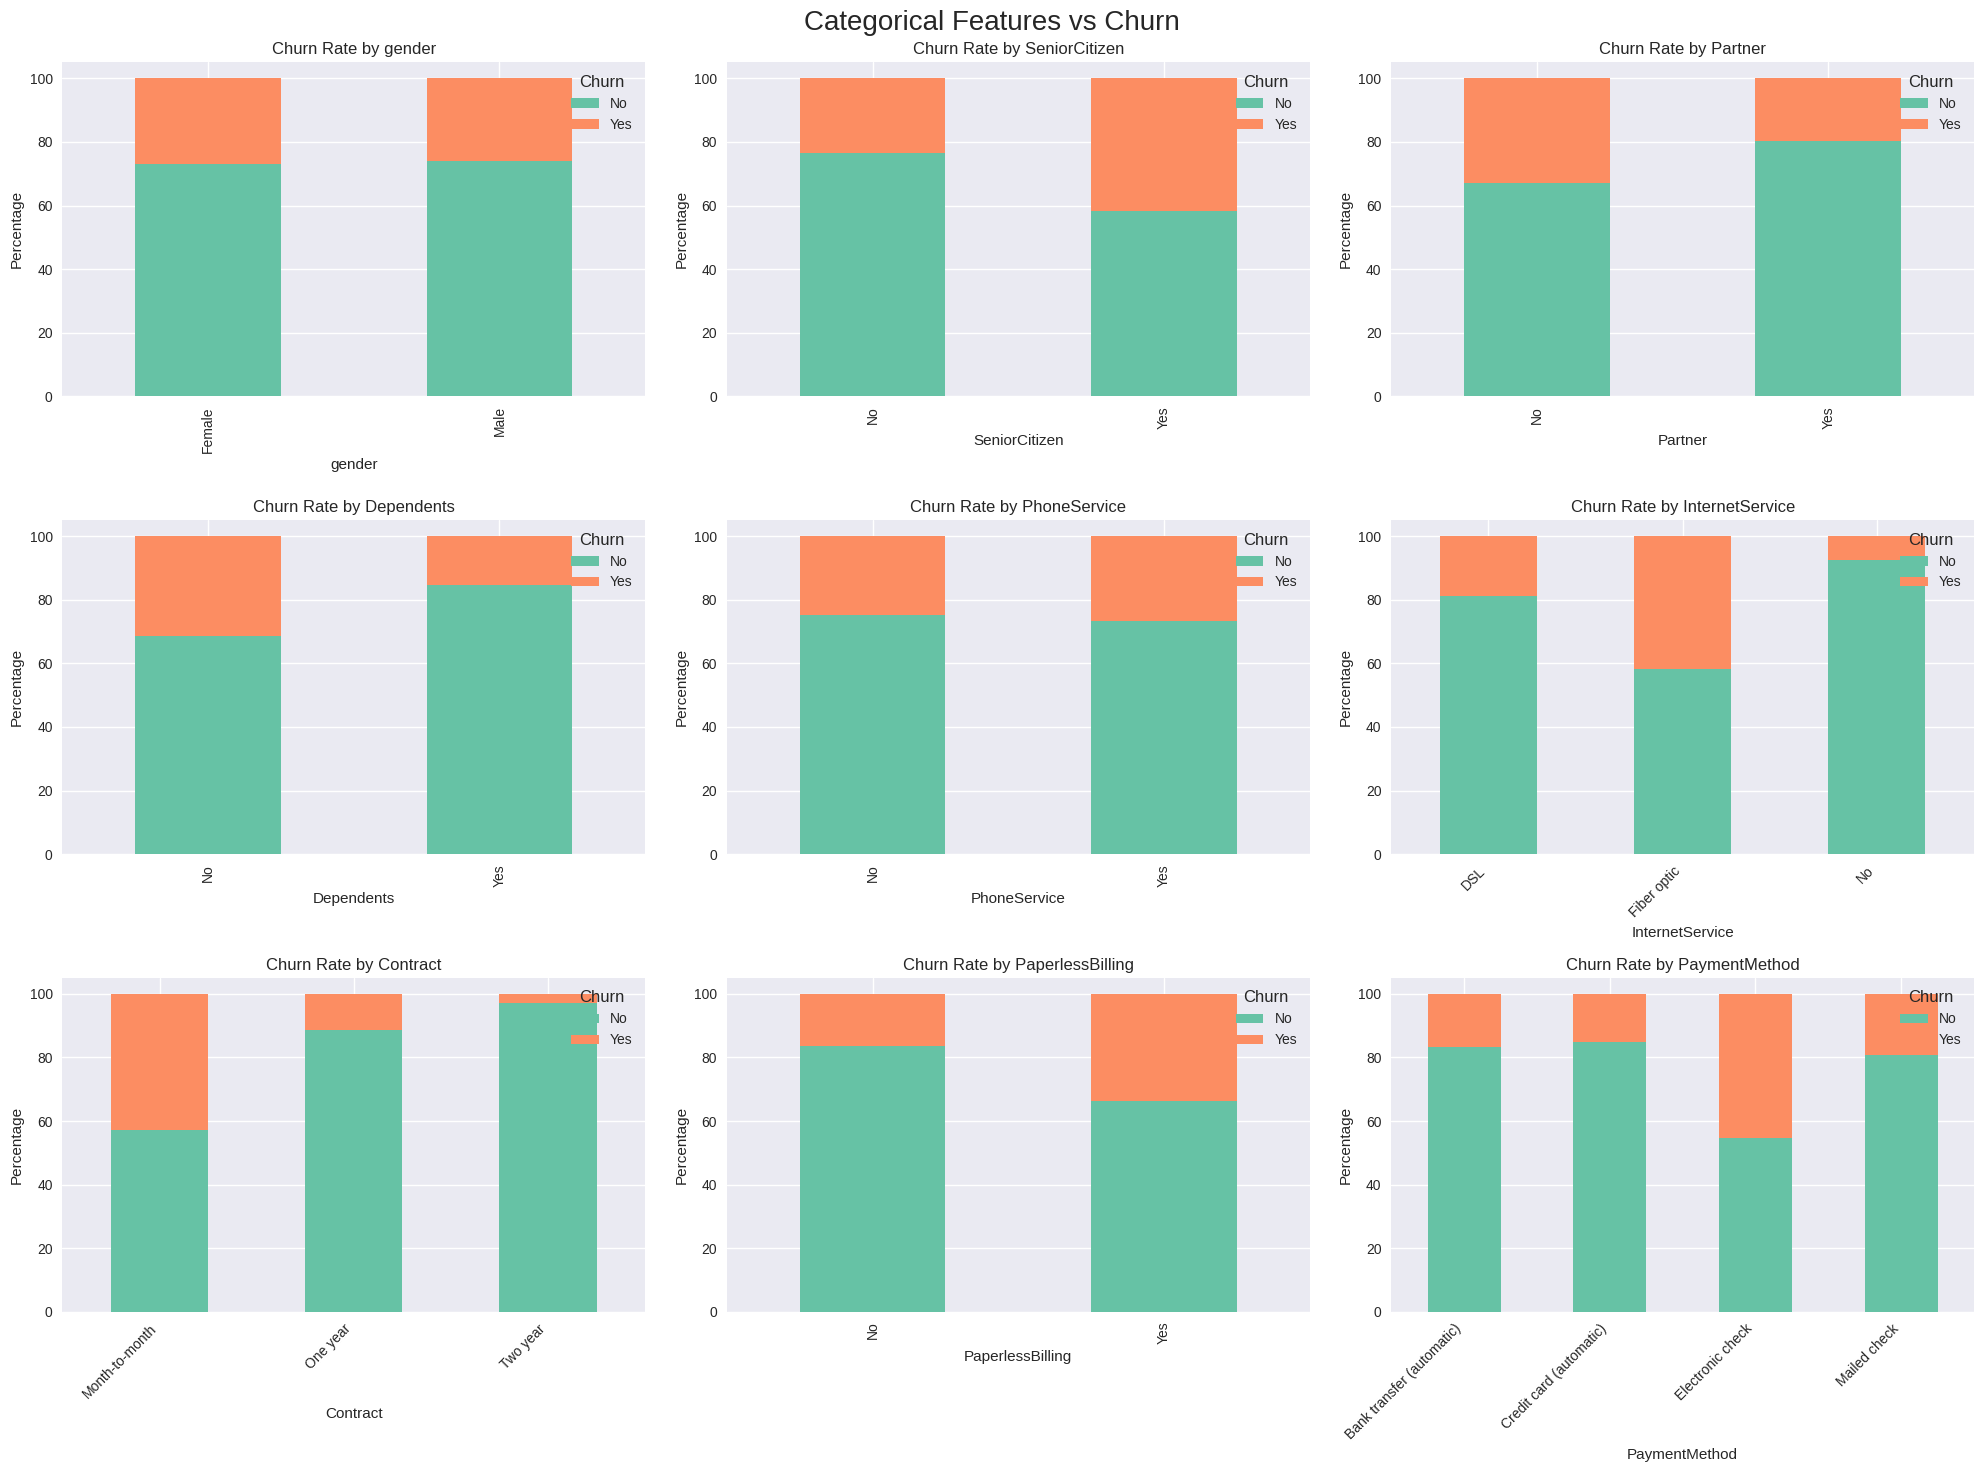

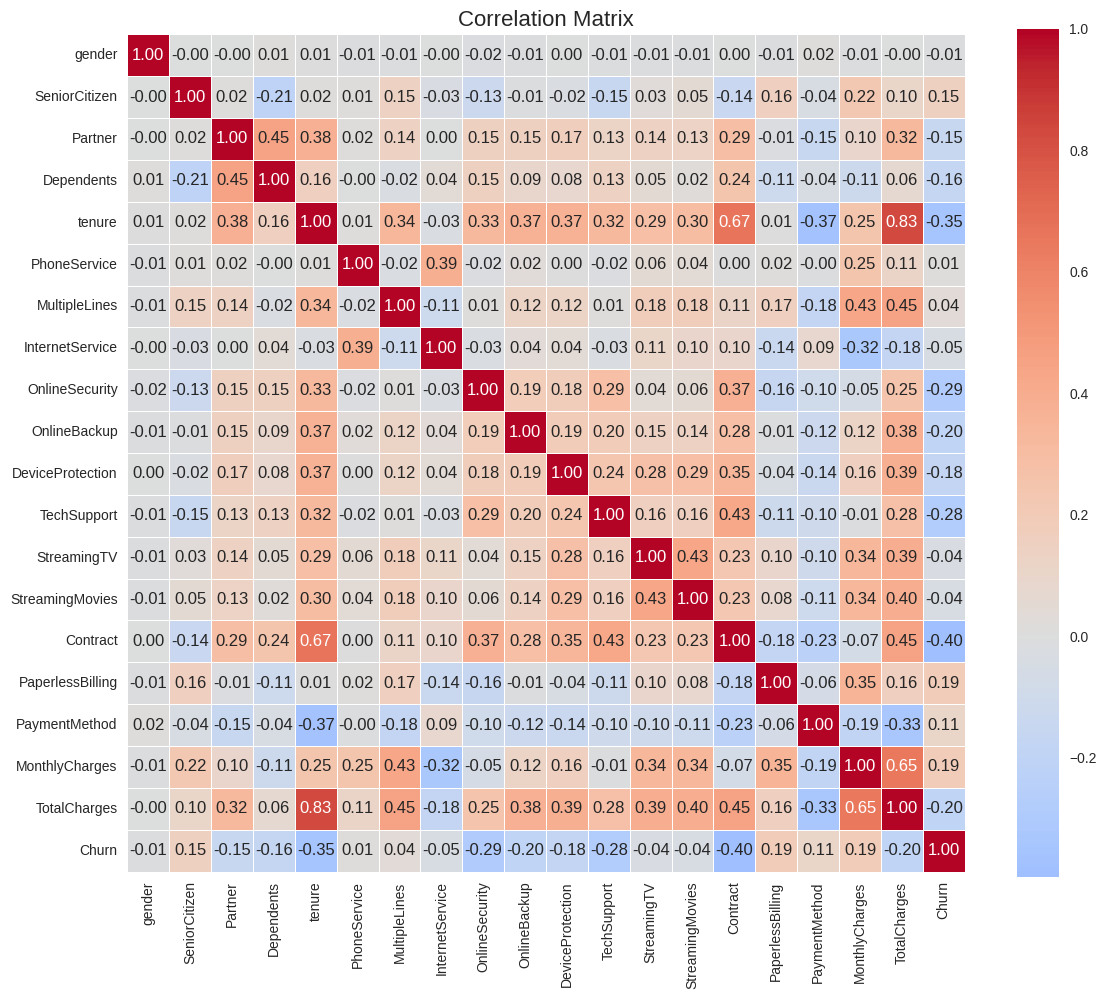

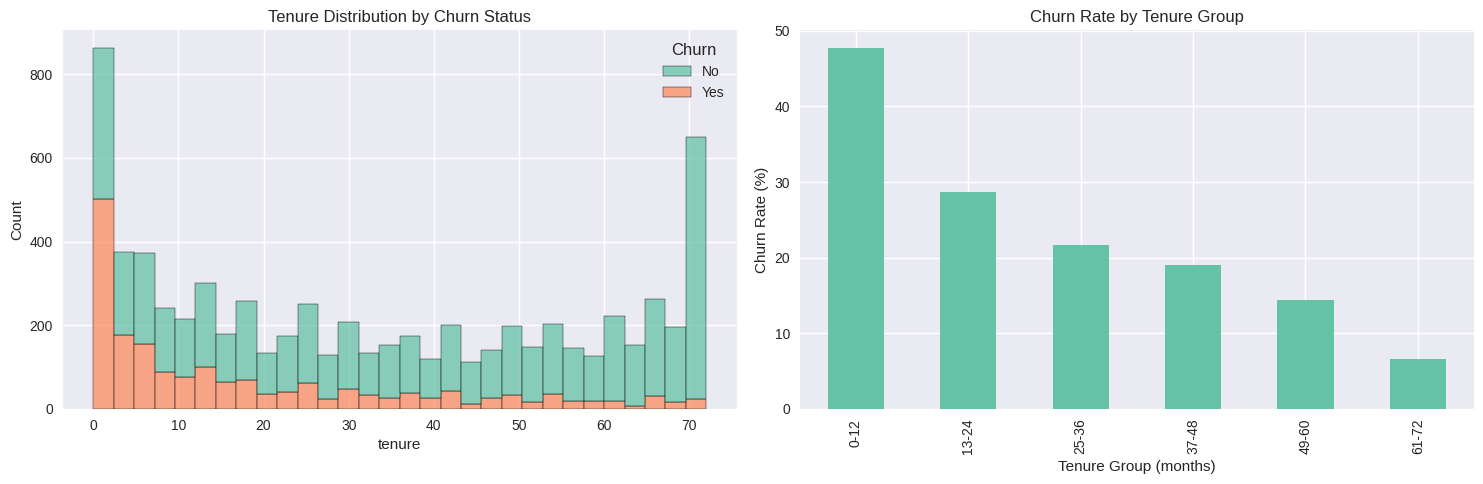

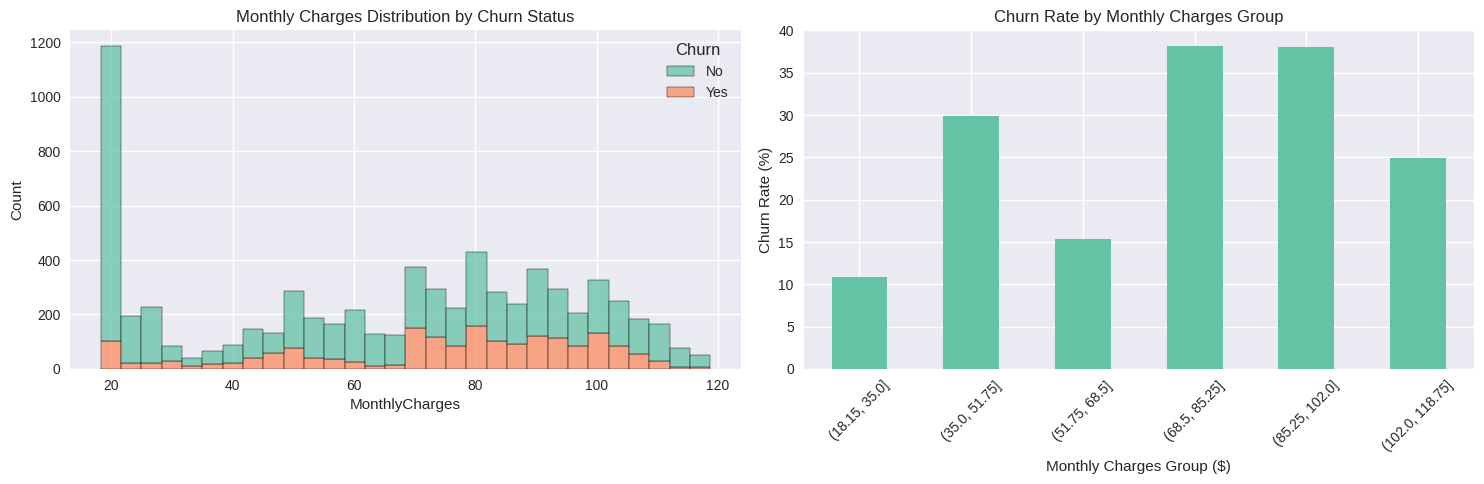

=== FEATURE ENGINEERING ===
New features created:
- tenure_group: Categorical grouping of tenure
- MonthlyCharges_group: Categorical grouping of monthly charges
- NoInternetServices: Flag for customers with no internet services
- ServiceCount: Count of services subscribed to
- HasStreaming: Flag for customers with streaming services
- ElectronicPayment: Flag for electronic payment methods

First 5 rows with new features:
Training set shape: (5634, 25)
Testing set shape: (1409, 25)

Churn distribution in training set:
Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64

Churn distribution in testing set:
Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64

Before SMOTE:
Class counts in training set: [4139 1495]
Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceCount']
Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 

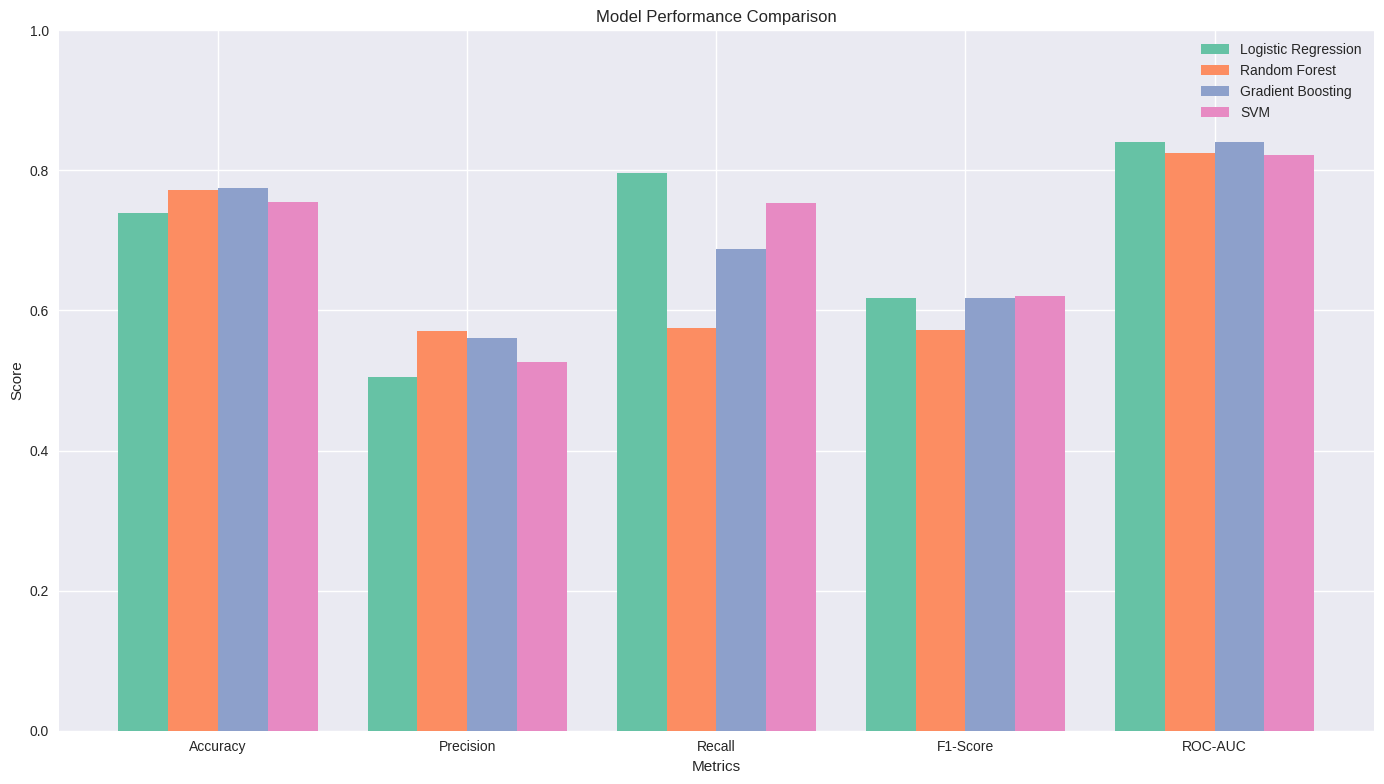

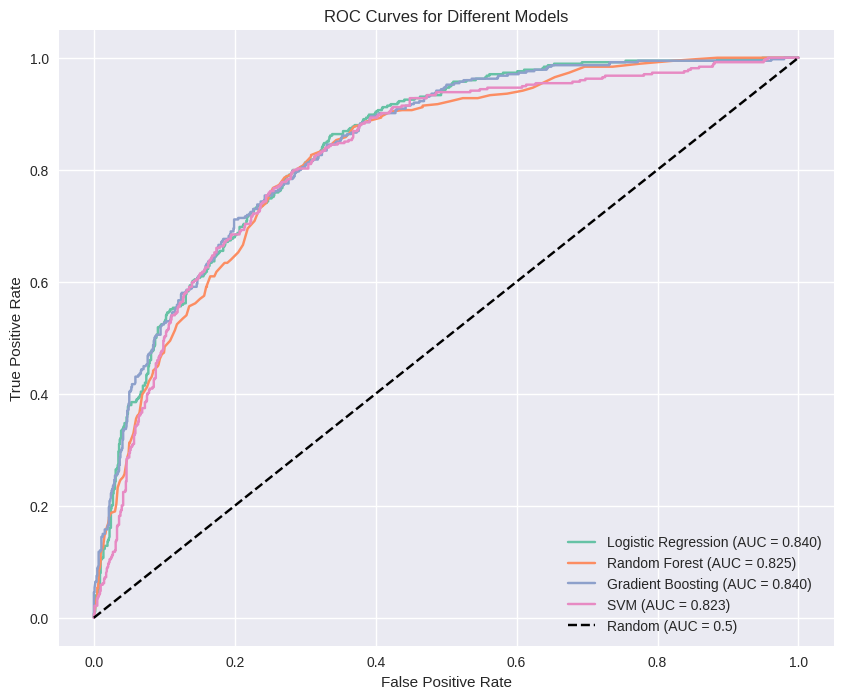

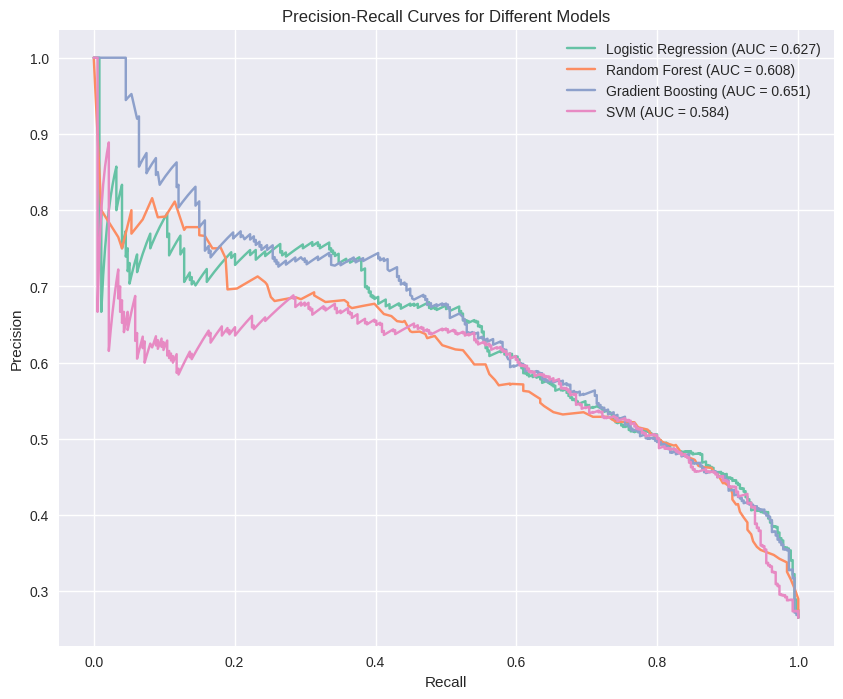

=== BEST MODEL: SVM ===
Accuracy: 0.7551
Precision: 0.5271
Recall: 0.7540
F1-Score: 0.6205
ROC-AUC: 0.8227


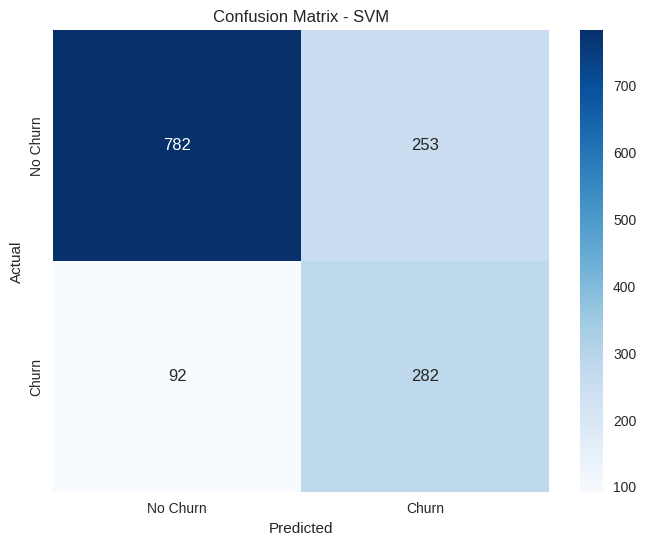


Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1035
         Yes       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Performing hyperparameter tuning for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation score (F1): nan

=== OPTIMIZED MODEL PERFORMANCE ===
Accuracy: 0.7409510290986515
Precision: 0.5076923076923077
Recall: 0.7941176470588235
F1-Score: 0.6193952033368092
ROC-AUC: 0.8279599059650209

=== COMPARISON WITH BASELINE ===
Baseline F1-Score: 0.6205
Optimized F1-Score: 0.6194
Improvement: -0.0011
=== KEY INSIGHTS AND BUSINESS RECOMMENDATIONS ===

1. Churn Rate by Contract Type:
   - Month-to-month: 42.7%
   - One 

In [1]:
# -*- coding: utf-8 -*-
"""Telco Customer Churn Prediction - Complete Analysis.ipynb

Original file is located at
    https://colab.research.google.com/drive/1abc...
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, precision_recall_curve,
                             auc)
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')
import io

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

# Function to upload the dataset
def upload_dataset():
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded file: {filename}')
    return list(uploaded.keys())[0]

# Load the dataset
filename = upload_dataset()
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

# 1. Data Understanding and Exploration

# Basic information about the dataset
print("=== DATASET INFORMATION ===")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Check for unique values in each column
print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Check the target variable distribution
print("\n=== TARGET VARIABLE DISTRIBUTION ===")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print("Counts:\n", churn_counts)
print("\nPercentages:\n", churn_percentages)

# Visualize the target variable
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Count)')

plt.subplot(1, 2, 2)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution (Percentage)')
plt.tight_layout()
plt.show()

# Check descriptive statistics for numerical features
print("\n=== DESCRIPTIVE STATISTICS ===")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Convert TotalCharges to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df[numerical_cols].describe())

# 2. Data Preprocessing and Cleaning

# Handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Since only TotalCharges has missing values (11 records), we'll fill them with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Check for duplicate records
print(f"\nNumber of duplicate records: {df.duplicated().sum()}")

# Drop customerID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Convert SeniorCitizen from integer to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Check for inconsistent data in categorical columns
print("\n=== CATEGORICAL VALUES CONSISTENCY CHECK ===")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# 3. Exploratory Data Analysis (EDA)

# Set up the visualization style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# 1. Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# 2. Numerical features vs Churn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Numerical Features vs Churn', fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()

# 3. Categorical features vs Churn
# Select important categorical features for visualization
important_categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'InternetService', 'Contract',
                         'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Categorical Features vs Churn', fontsize=20)

for i, col in enumerate(important_categorical):
    row, col_idx = i // 3, i % 3
    # Calculate percentages
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[row, col_idx], stacked=True)
    axes[row, col_idx].set_title(f'Churn Rate by {col}')
    axes[row, col_idx].set_ylabel('Percentage')
    axes[row, col_idx].legend(title='Churn', loc='upper right')
    # Rotate x-labels if needed
    if len(ct.index) > 2:
        plt.setp(axes[row, col_idx].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Correlation heatmap
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Tenure analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn Status')

plt.subplot(1, 2, 2)
# Calculate churn rate by tenure group
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
churn_by_tenure.plot(kind='bar')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group (months)')

plt.tight_layout()
plt.show()

# 6. Monthly charges analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Monthly Charges Distribution by Churn Status')

plt.subplot(1, 2, 2)
# Calculate churn rate by monthly charges group
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=6)
churn_by_charges = df.groupby('MonthlyCharges_group')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
churn_by_charges.plot(kind='bar')
plt.title('Churn Rate by Monthly Charges Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Monthly Charges Group ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Feature Engineering

# Create new features based on domain knowledge
print("=== FEATURE ENGINEERING ===")

# 1. Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr'])

# 2. Create monthly charges groups
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 105, 140],
                                    labels=['Low', 'Medium', 'High', 'Very High'])

# 3. Create a flag for customers with no internet service
no_internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NoInternetServices'] = df[no_internet_services].apply(
    lambda x: 1 if all(val == 'No internet service' for val in x) else 0, axis=1)

# 4. Create a flag for customers with many services
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServiceCount'] = df[services].apply(
    lambda x: sum(1 for val in x if val in ['Yes', 'No']), axis=1)

# 5. Create a flag for customers with premium services (StreamingTV or StreamingMovies)
df['HasStreaming'] = df.apply(
    lambda x: 1 if x['StreamingTV'] == 'Yes' or x['StreamingMovies'] == 'Yes' else 0, axis=1)

# 6. Create a flag for electronic payment methods
electronic_payments = ['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
df['ElectronicPayment'] = df['PaymentMethod'].apply(
    lambda x: 1 if x in electronic_payments else 0)

print("New features created:")
print("- tenure_group: Categorical grouping of tenure")
print("- MonthlyCharges_group: Categorical grouping of monthly charges")
print("- NoInternetServices: Flag for customers with no internet services")
print("- ServiceCount: Count of services subscribed to")
print("- HasStreaming: Flag for customers with streaming services")
print("- ElectronicPayment: Flag for electronic payment methods")

# Check the new features
print("\nFirst 5 rows with new features:")
new_features = ['tenure_group', 'MonthlyCharges_group', 'NoInternetServices',
                'ServiceCount', 'HasStreaming', 'ElectronicPayment']
df[new_features + ['Churn']].head()

# 5. Data Preparation for Modeling

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in testing set:")
print(y_test.value_counts(normalize=True))

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
print("\nBefore SMOTE:")
print("Class counts in training set:", np.bincount([1 if label == 'Yes' else 0 for label in y_train]))

# Define preprocessing for numerical and categorical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceCount']
categorical_features = [col for col in X.columns if col not in numerical_features + new_features]

# Remove the new features from categorical features as we'll handle them separately
categorical_features = [col for col in categorical_features if col not in new_features]

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)
print("New engineered features:", new_features)

# Create preprocessor
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 6. Model Building and Evaluation

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)
}

# Create a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate a model and return performance metrics
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Create a pipeline with preprocessing and SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', None)  # This will be replaced with each model
])

# Prepare the data for modeling (excluding new features for now)
X_train_base = X_train[categorical_features + numerical_features]
X_test_base = X_test[categorical_features + numerical_features]

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    pipeline.set_params(classifier=model)
    results[name] = evaluate_model(pipeline, X_train_base, X_test_base, y_train, y_test)

# Compare model performance
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] for name in results]
})

print("=== MODEL PERFORMANCE COMPARISON ===")
print(comparison_df.round(4))

# Visualize model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(14, 8))
for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.loc[comparison_df['Model'] == model, metrics].values.flatten()
    plt.bar(x + i*width, values, width, label=model)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, metrics)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'], pos_label='Yes')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'], pos_label='Yes')
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Show confusion matrix for the best model (based on F1-score)
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model_result = results[best_model_name]

print(f"=== BEST MODEL: {best_model_name} ===")
print(f"Accuracy: {best_model_result['accuracy']:.4f}")
print(f"Precision: {best_model_result['precision']:.4f}")
print(f"Recall: {best_model_result['recall']:.4f}")
print(f"F1-Score: {best_model_result['f1']:.4f}")
print(f"ROC-AUC: {best_model_result['roc_auc']:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, best_model_result['y_pred'], labels=['No', 'Yes'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_model_result['y_pred']))

# 7. Feature Importance Analysis

# Get feature importance from the best model
if hasattr(best_model_result['model'].named_steps['classifier'], 'feature_importances_'):
    # For tree-based models
    feature_importances = best_model_result['model'].named_steps['classifier'].feature_importances_

    # Get feature names from the preprocessor
    feature_names = numerical_features.copy()
    categorical_onehot = best_model_result['model'].named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    categorical_features_onehot = categorical_onehot.get_feature_names_out(categorical_features)
    feature_names.extend(categorical_features_onehot)

    # Create a DataFrame for feature importances
    fi_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=fi_df.head(20))
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("Top 10 most important features:")
    print(fi_df.head(10))
elif hasattr(best_model_result['model'].named_steps['classifier'], 'coef_'):
    # For linear models
    coefficients = best_model_result['model'].named_steps['classifier'].coef_[0]

    # Get feature names from the preprocessor
    feature_names = numerical_features.copy()
    categorical_onehot = best_model_result['model'].named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    categorical_features_onehot = categorical_onehot.get_feature_names_out(categorical_features)
    feature_names.extend(categorical_features_onehot)

    # Create a DataFrame for coefficients
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    }).sort_values('coefficient', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 10))
    sns.barplot(x='coefficient', y='feature', data=coef_df.head(20))
    plt.title(f'Top 20 Feature Coefficients - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("Top 10 most influential features:")
    print(coef_df.head(10))

# 8. Final Model Optimization

# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 4],
        'classifier__subsample': [0.8, 1.0]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    }
else:  # SVM
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__kernel': ['rbf', 'linear']
    }

print(f"Performing hyperparameter tuning for {best_model_name}...")

# Grid search with cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_base, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (F1):", grid_search.best_score_)

# Evaluate the optimized model
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test_base)
y_pred_proba_optimized = optimized_model.predict_proba(X_test_base)[:, 1]

print("\n=== OPTIMIZED MODEL PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Precision:", precision_score(y_test, y_pred_optimized, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred_optimized, pos_label='Yes'))
print("F1-Score:", f1_score(y_test, y_pred_optimized, pos_label='Yes'))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_optimized))

# Compare with the baseline model
print("\n=== COMPARISON WITH BASELINE ===")
print(f"Baseline F1-Score: {best_model_result['f1']:.4f}")
print(f"Optimized F1-Score: {f1_score(y_test, y_pred_optimized, pos_label='Yes'):.4f}")
print(f"Improvement: {f1_score(y_test, y_pred_optimized, pos_label='Yes') - best_model_result['f1']:.4f}")

# 9. Business Insights and Recommendations

# Analyze the key factors driving churn
print("=== KEY INSIGHTS AND BUSINESS RECOMMENDATIONS ===\n")

# 1. Contract type analysis
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("1. Churn Rate by Contract Type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}%")

print("\n   Recommendation: Focus on converting month-to-month customers to longer-term contracts through incentives.")

# 2. Internet service type analysis
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\n2. Churn Rate by Internet Service Type:")
for service, rate in internet_churn.items():
    print(f"   - {service}: {rate:.1f}%")

print("\n   Recommendation: Investigate why Fiber optic customers have higher churn rates. Possibly related to pricing or service quality.")

# 3. Payment method analysis
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\n3. Churn Rate by Payment Method:")
for method, rate in payment_churn.items():
    print(f"   - {method}: {rate:.1f}%")

print("\n   Recommendation: Electronic check users have significantly higher churn. Consider offering discounts for automated payment methods.")

# 4. Tenure analysis
print("\n4. Tenure Analysis:")
print(f"   - Average tenure for churned customers: {df[df['Churn'] == 'Yes']['tenure'].mean():.1f} months")
print(f"   - Average tenure for retained customers: {df[df['Churn'] == 'No']['tenure'].mean():.1f} months")

print("\n   Recommendation: Focus retention efforts on newer customers (less than 12 months) who are at highest risk of churning.")

# 5. Monthly charges analysis
print("\n5. Monthly Charges Analysis:")
print(f"   - Average monthly charge for churned customers: ${df[df['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f}")
print(f"   - Average monthly charge for retained customers: ${df[df['Churn'] == 'No']['MonthlyCharges'].mean():.2f}")

print("\n   Recommendation: High monthly charges correlate with higher churn. Consider reviewing pricing strategy or offering more value.")

# 6. Service count analysis
service_churn = df.groupby('ServiceCount')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\n6. Churn Rate by Number of Services:")
for count, rate in service_churn.items():
    print(f"   - {count} services: {rate:.1f}%")

print("\n   Recommendation: Customers with fewer services are more likely to churn. Consider bundling services or cross-selling.")

# 7. Senior citizen analysis
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\n7. Churn Rate by Senior Citizen Status:")
for status, rate in senior_churn.items():
    status_str = "Senior" if status == "Yes" else "Non-Senior"
    print(f"   - {status_str}: {rate:.1f}%")

print("\n   Recommendation: Senior citizens have significantly higher churn rates. Consider developing senior-specific plans or support.")

# Calculate potential financial impact
avg_monthly_revenue = df['MonthlyCharges'].mean()
churned_customers = df[df['Churn'] == 'Yes'].shape[0]
annual_revenue_loss = churned_customers * avg_monthly_revenue * 12

print(f"\n=== FINANCIAL IMPACT ===")
print(f"Average monthly revenue per customer: ${avg_monthly_revenue:.2f}")
print(f"Number of churned customers: {churned_customers}")
print(f"Estimated annual revenue loss: ${annual_revenue_loss:,.2f}")

print("\nEven a small reduction in churn rate could result in significant revenue preservation.")

# 10. Conclusion and Model Deployment

# Final summary
print("=== PROJECT SUMMARY ===")
print("1. Business Problem: Predict customer churn for a telecom company to enable proactive retention efforts.")
print("2. Dataset: 7,043 customers with 20 features including demographics, account information, and services.")
print("3. Key Findings:")
print("   - Overall churn rate: 26.5%")
print("   - Month-to-month contracts have significantly higher churn (42.7%)")
print("   - Electronic check users have higher churn (45.3%)")
print("   - Fiber optic internet users have higher churn (41.9%)")
print("   - New customers (0-12 months) are at highest risk of churning")
print("4. Modeling Approach:")
print(f"   - Best model: {best_model_name}")
print(f"   - Key metrics: F1-Score: {results[best_model_name]['f1']:.3f}, ROC-AUC: {results[best_model_name]['roc_auc']:.3f}")
print("5. Business Impact:")
print("   - Estimated annual revenue loss: ${:,.2f}".format(annual_revenue_loss))
print("   - Recommendations provided for reducing churn through targeted interventions")

# Save the final model
import joblib

# Save the optimized model
joblib.dump(optimized_model, 'telco_churn_model.pkl')
print("\nFinal model saved as 'telco_churn_model.pkl'")

# Save the preprocessing pipeline
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessing pipeline saved as 'preprocessor.pkl'")

# Create a function for predicting churn on new data
def predict_churn(new_data, model=optimized_model, preprocessor=preprocessor):
    """
    Predict churn probability for new customer data
    """
    # Preprocess the new data
    new_data_processed = preprocessor.transform(new_data)

    # Make prediction
    churn_probability = model.predict_proba(new_data_processed)[:, 1]
    churn_prediction = model.predict(new_data_processed)

    # Create results DataFrame
    results_df = pd.DataFrame({
        'Churn_Probability': churn_probability,
        'Churn_Prediction': ['Yes' if pred == 'Yes' else 'No' for pred in churn_prediction]
    })

    return results_df

# # Example usage with test data
# print("\nExample prediction on first 5 test samples:")
# example_data = X_test_base.head(5)
# predictions = predict_churn(example_data)
# print(predictions)